In [1]:
from common.path import *
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('figure', figsize=(10, 7))

In [2]:
all_cases = pd.read_parquet(PROCESSED_DATA_DIR / 'casos.parquet')
all_cases.dropna(subset=['cad_dt_notificacao', 'dg_covid'], inplace=True)

# Atributos derivados
all_cases['cad-idade'] = (all_cases.cad_dt_notificacao - all_cases.cad_dt_nascimento).astype("timedelta64[Y]")

# Perguntas descritivas

## 1. Quantos casos de SRAG (COVID e não-COVID) houveram em cada ano?

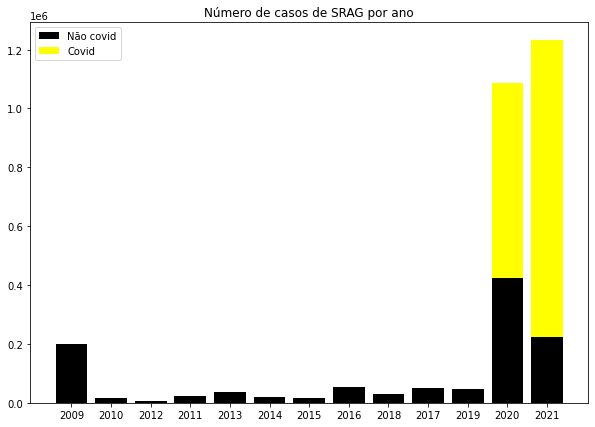

In [4]:
true_covid_cases = all_cases[all_cases.dg_covid == 1]

if True:
    non_covid_cases = all_cases[all_cases.dg_covid == 0]

    x = all_cases.cad_dt_notificacao.dt.strftime('%Y').unique()
    y0 = non_covid_cases.groupby(all_cases.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()
    y1 = pd.concat([pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]), true_covid_cases.groupby(all_cases.cad_dt_notificacao.dt.strftime('%Y')).size()]).to_numpy()

    plt.bar(x, y0, color='black', label='Não covid')
    plt.bar(x, y1, bottom=y0, color='yellow', label='Covid')

    plt.title("Número de casos de SRAG por ano")
    plt.legend()
    plt.show() 

In [5]:
PANDEMIC_DAY_ZERO = '2020-02-06'
non_covid_safe_cases = all_cases[(all_cases.dg_covid == 0) & (all_cases.vac_covid == 0) & (all_cases.cad_dt_notificacao < PANDEMIC_DAY_ZERO)]
unknow_cases = all_cases[(all_cases.dg_covid == 0) & (all_cases.vac_covid == 0) & (all_cases.cad_dt_notificacao >= PANDEMIC_DAY_ZERO)]

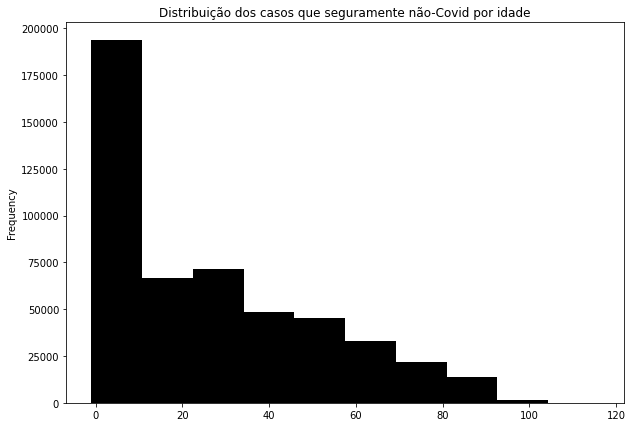

In [6]:
plt.title("Distribuição dos casos que seguramente não-Covid por idade")
non_covid_safe_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='black')
plt.show()

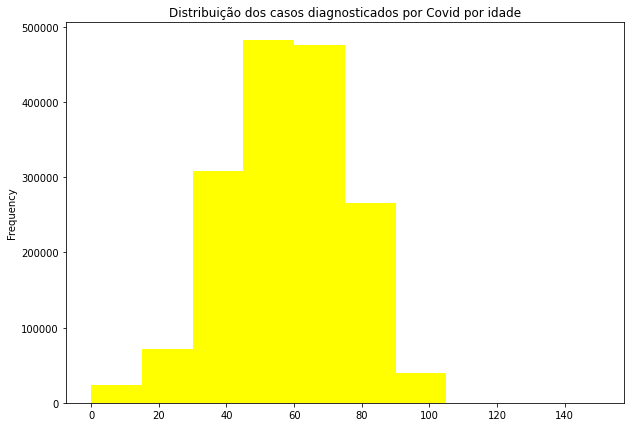

In [7]:
plt.title("Distribuição dos casos diagnosticados por Covid por idade")
true_covid_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='yellow')
plt.show()

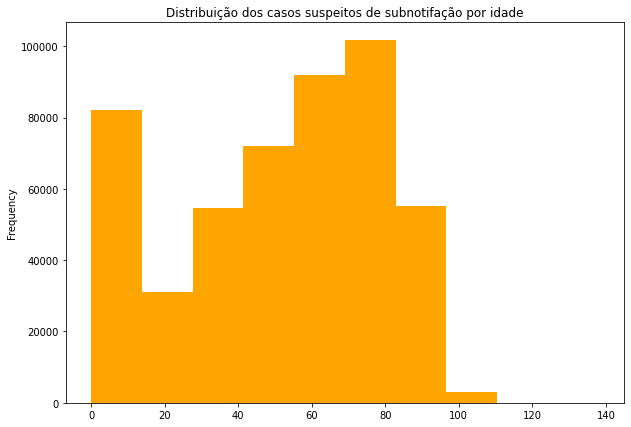

In [8]:
plt.title("Distribuição dos casos suspeitos de subnotifação por idade")
unknow_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='orange')
plt.show()

In [9]:
def compare_categorical_variables(COLUMN_NAME: str):
    if True:
        data = non_covid_safe_cases.dropna(subset=[COLUMN_NAME]).groupby(COLUMN_NAME).size()

        plt.title(f'Distribuição dos casos que seguramente não-Covid por {COLUMN_NAME}')
        (data/data.abs().max()).plot(kind='bar', color='black')
        plt.show()

    if True:
        data = true_covid_cases.dropna(subset=[COLUMN_NAME]).groupby(COLUMN_NAME).size()

        plt.title(f'Distribuição dos casos diagnosticados por Covid por {COLUMN_NAME}')
        (data/data.abs().max()).plot(kind='bar', color='yellow')
        plt.show()

    if True:
        data = unknow_cases.dropna(subset=[COLUMN_NAME]).groupby(COLUMN_NAME).size()

        plt.title(f'Distribuição dos casos suspeitos de subnotifação por {COLUMN_NAME}')
        (data/data.abs().max()).plot(kind='bar', color='orange')
        plt.show()

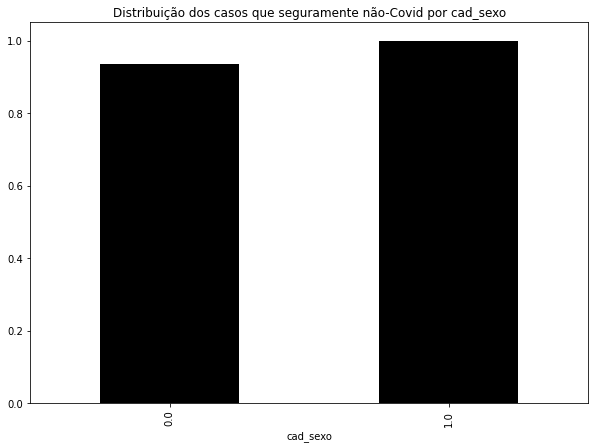

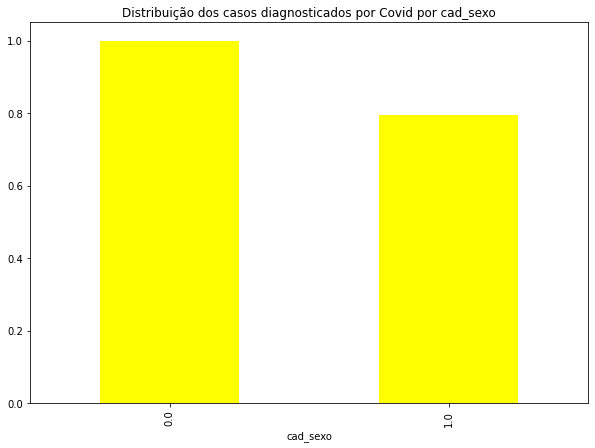

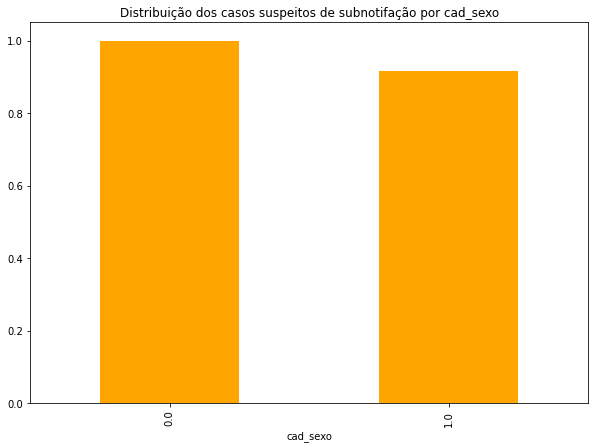

In [10]:
compare_categorical_variables('cad_sexo')

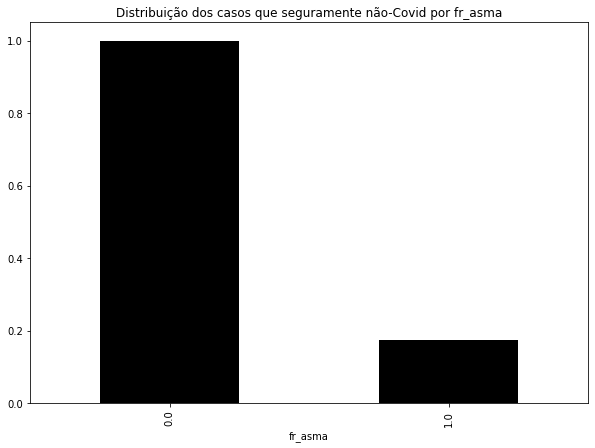

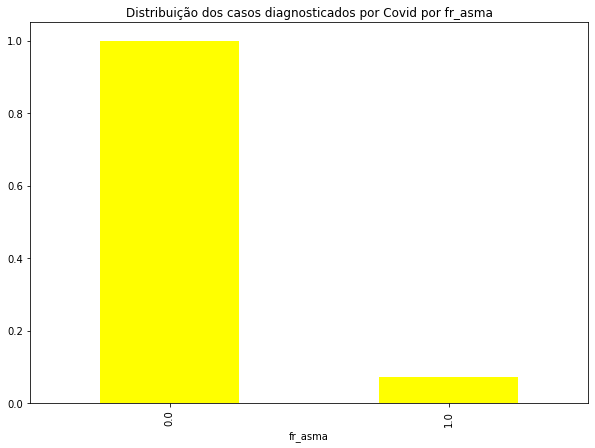

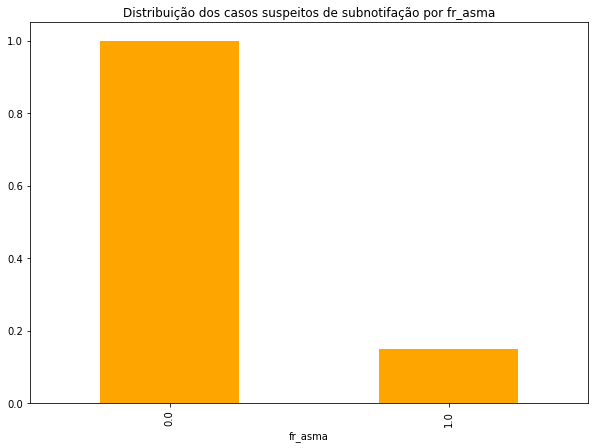

In [11]:
compare_categorical_variables('fr_asma')

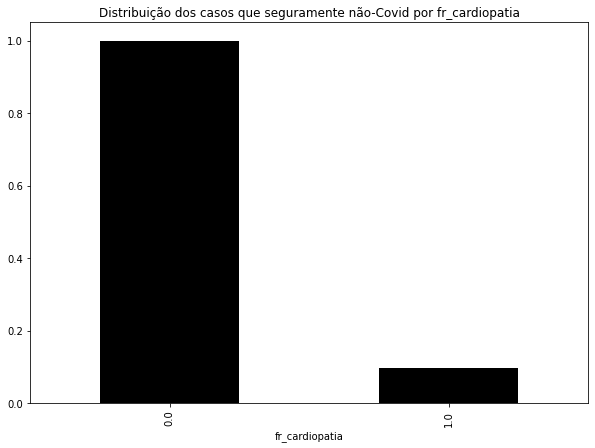

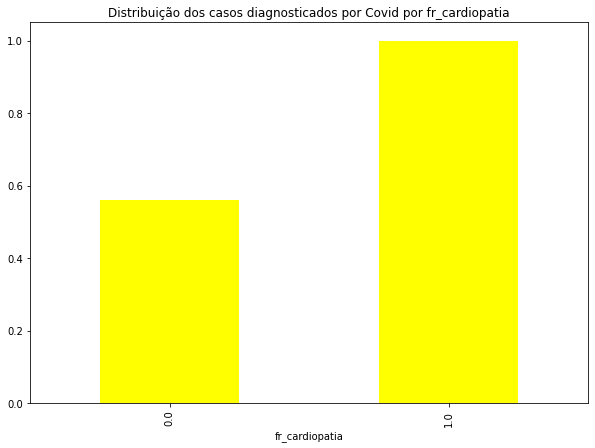

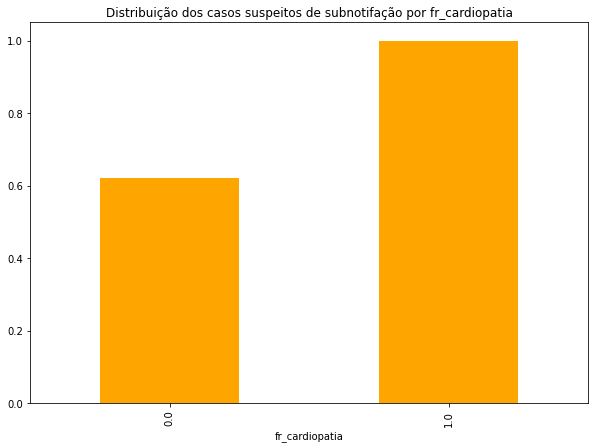

In [49]:
compare_categorical_variables('fr_cardiopatia')

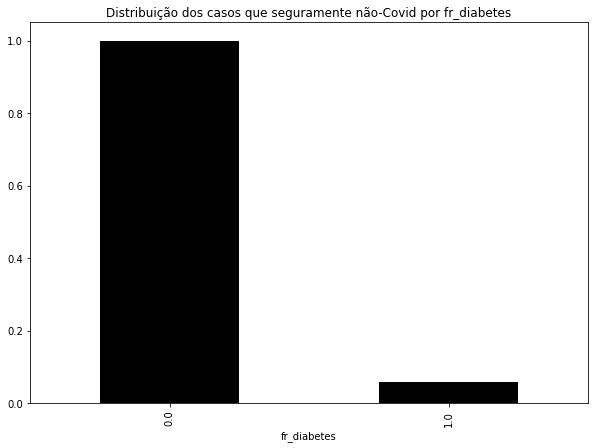

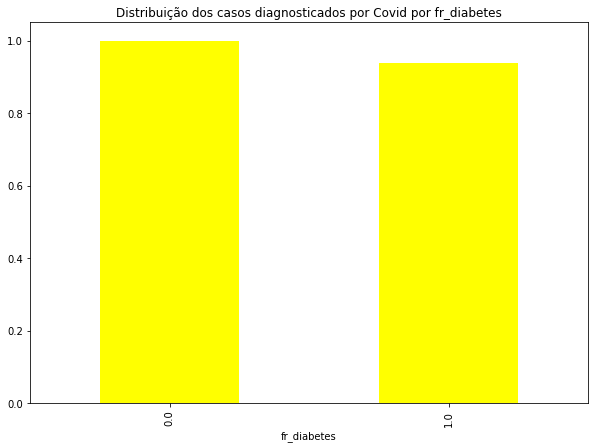

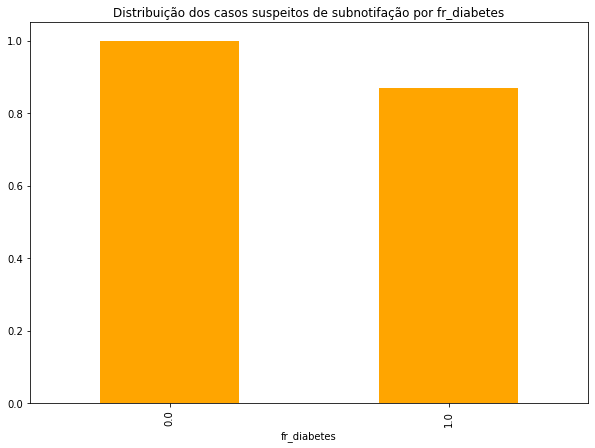

In [50]:
compare_categorical_variables('fr_diabetes')

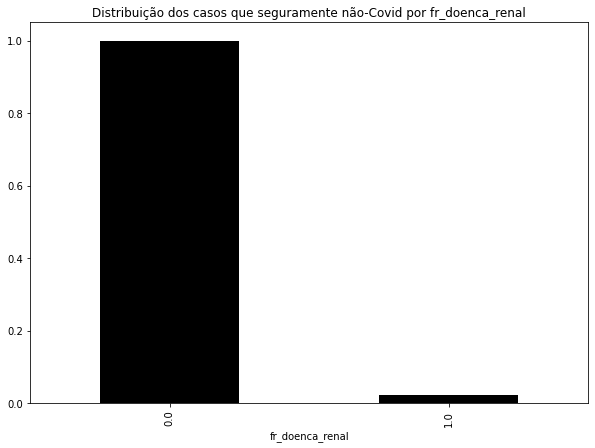

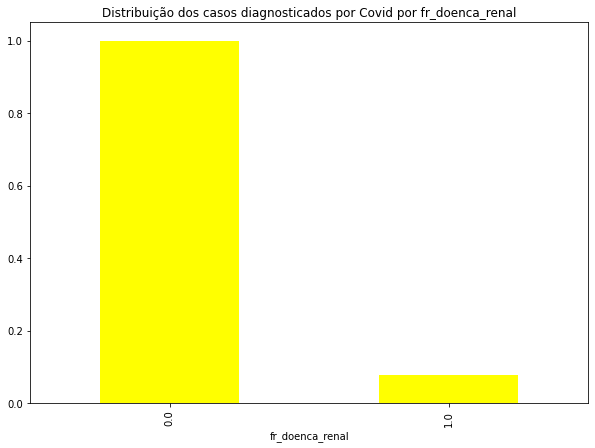

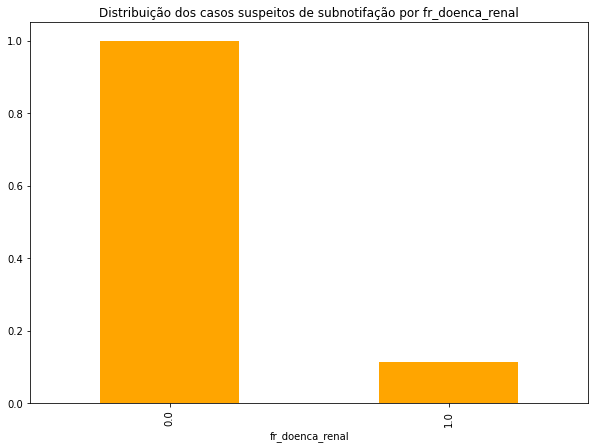

In [51]:
compare_categorical_variables('fr_doenca_renal')

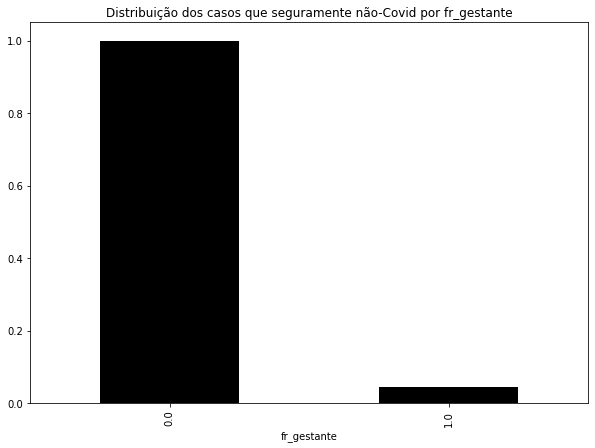

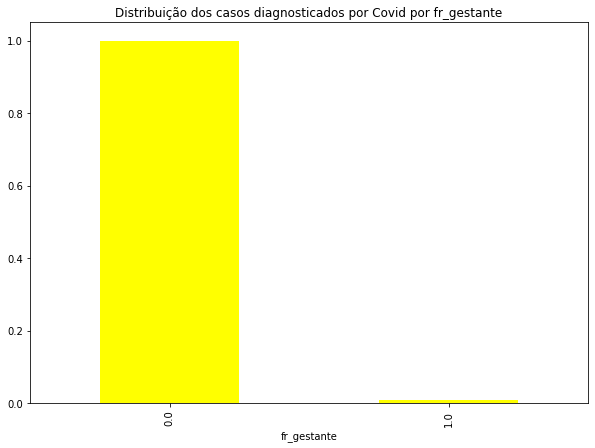

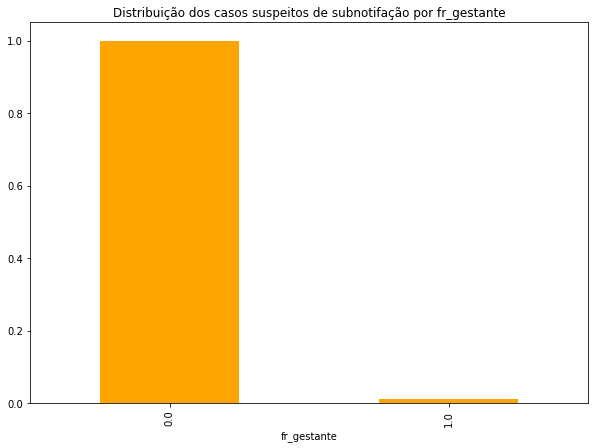

In [52]:
compare_categorical_variables('fr_gestante')

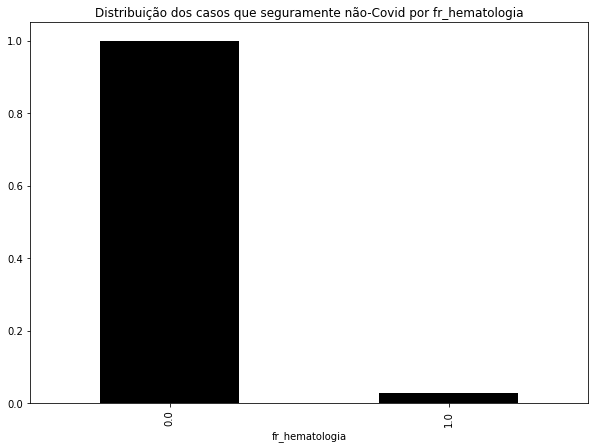

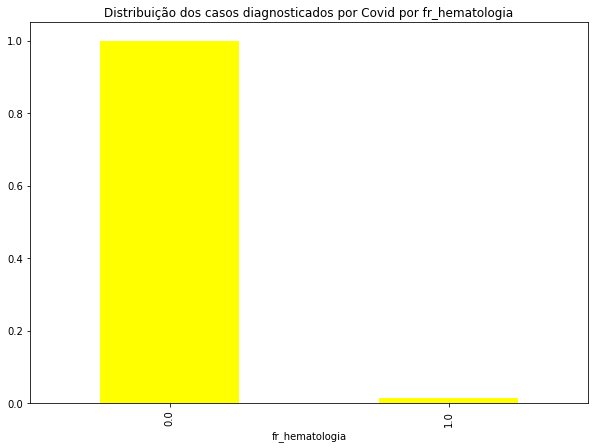

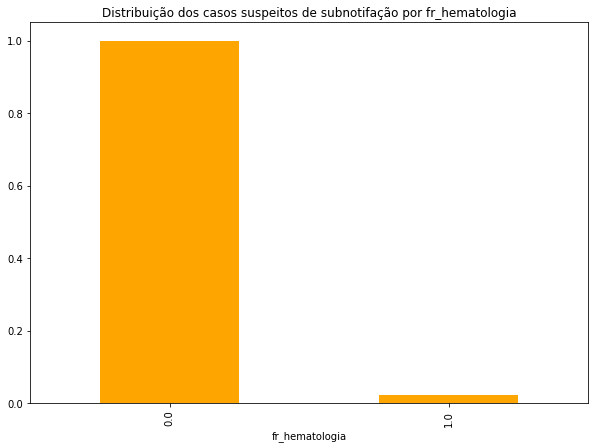

In [53]:
compare_categorical_variables('fr_hematologia')

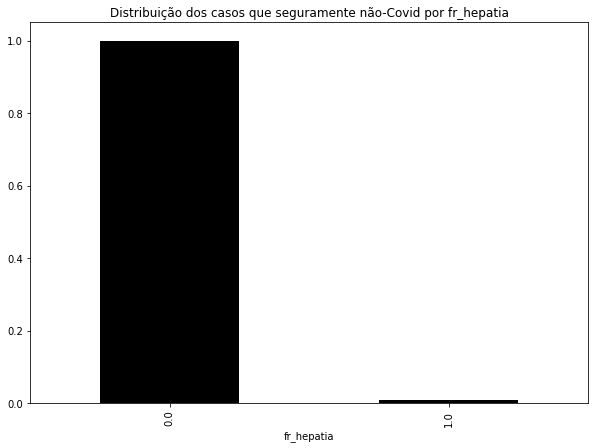

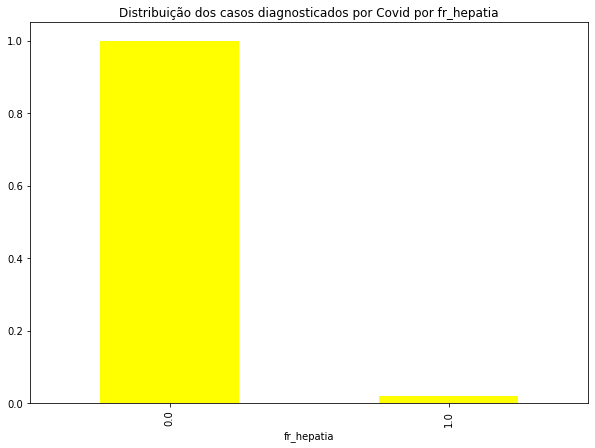

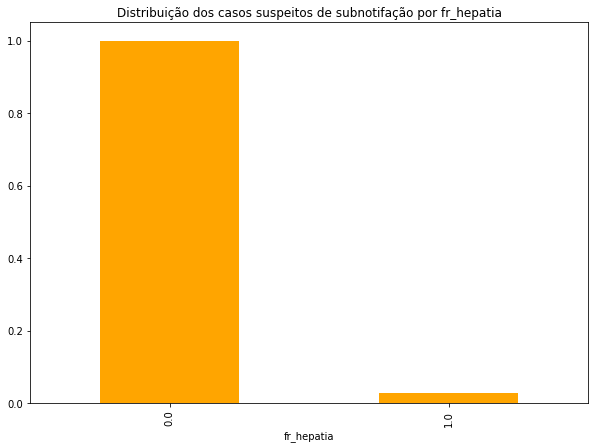

In [54]:
compare_categorical_variables('fr_hepatia')

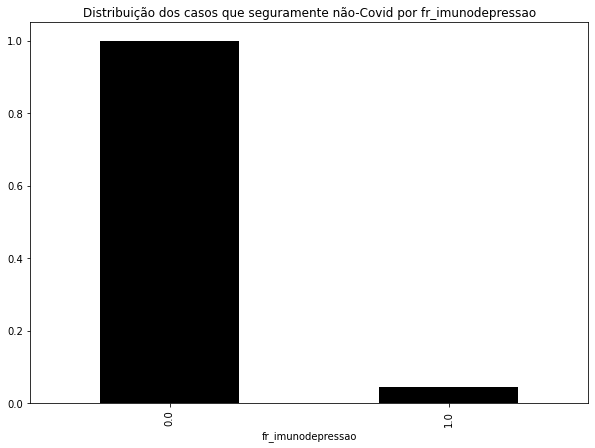

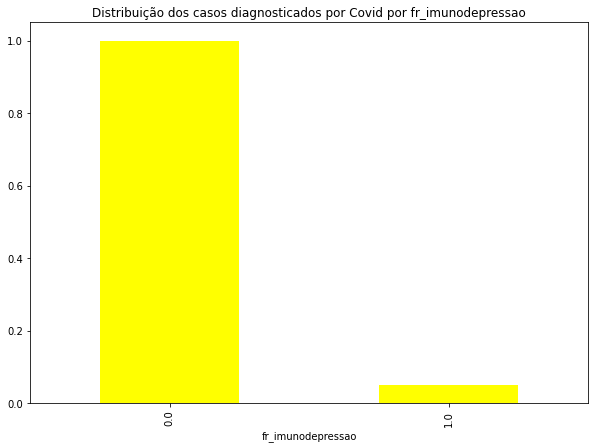

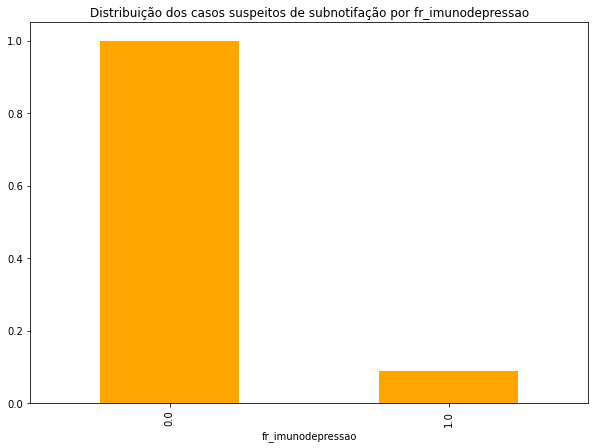

In [55]:
compare_categorical_variables('fr_imunodepressao')

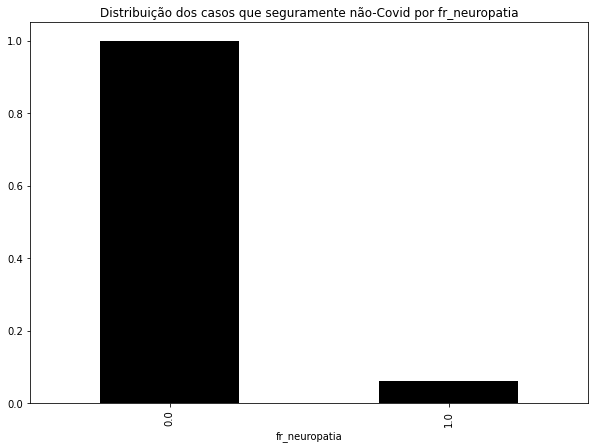

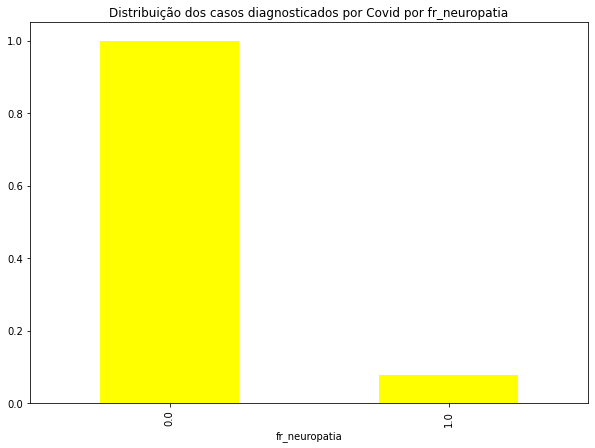

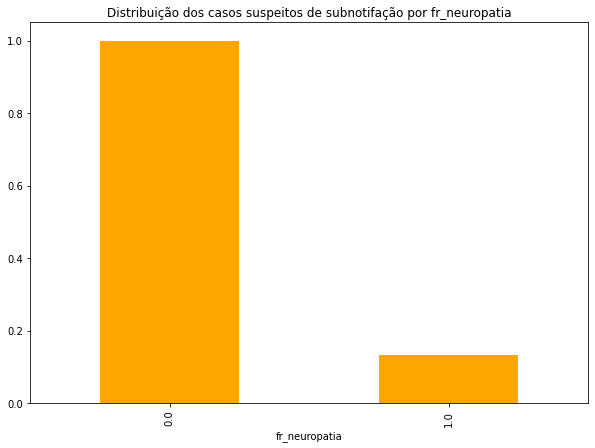

In [59]:
compare_categorical_variables('fr_neuropatia')

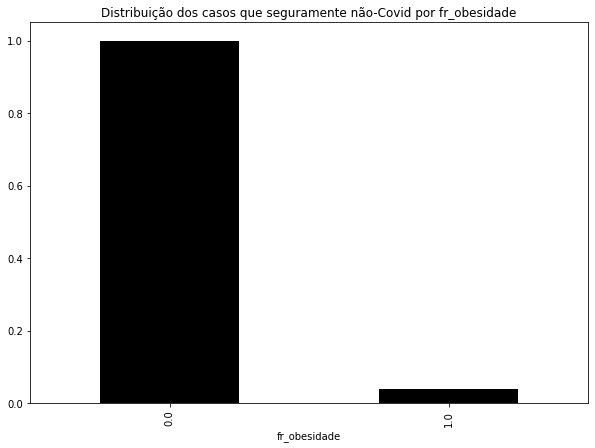

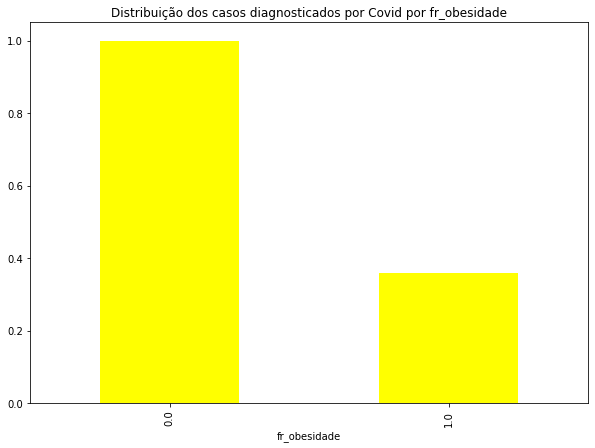

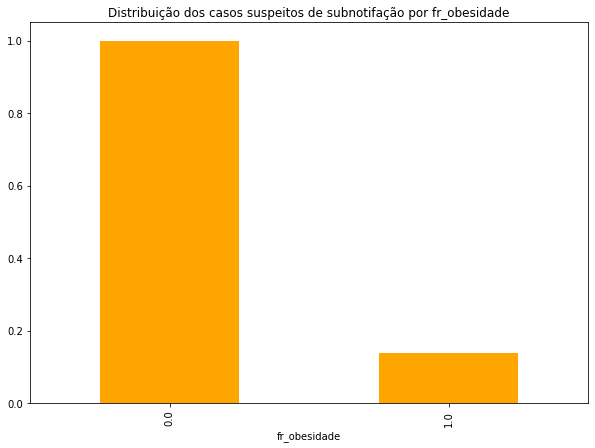

In [60]:
compare_categorical_variables('fr_obesidade')

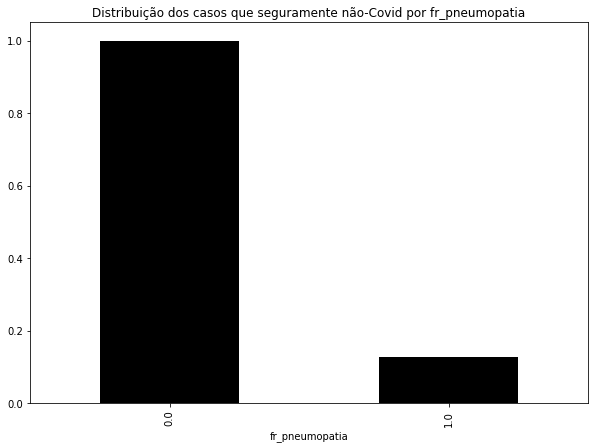

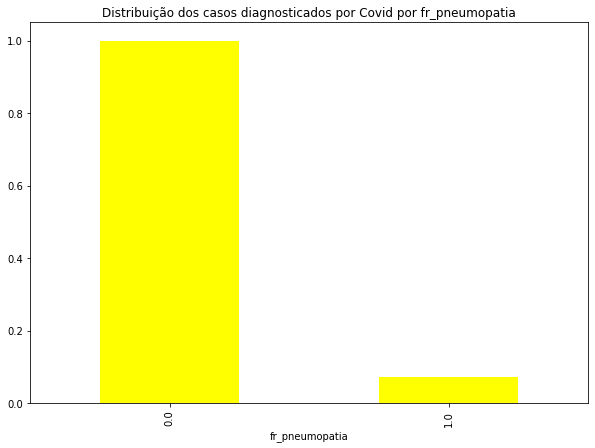

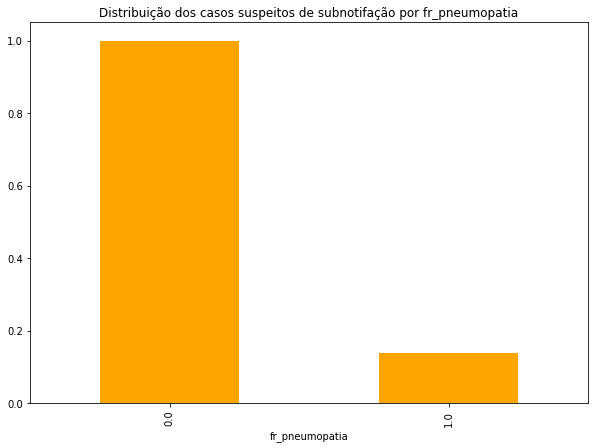

In [57]:
compare_categorical_variables('fr_pneumopatia')

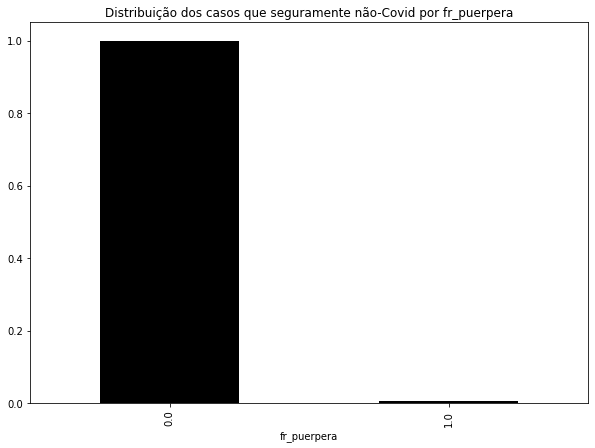

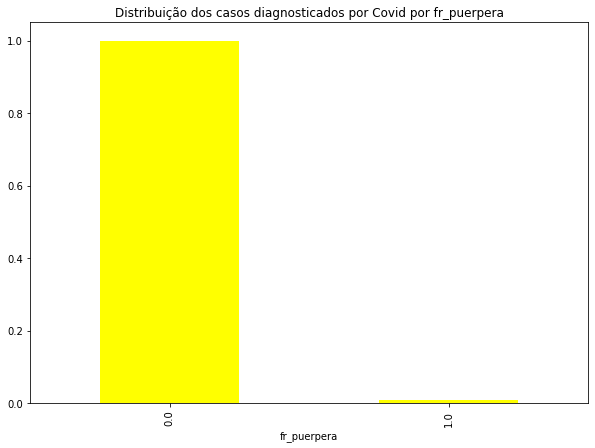

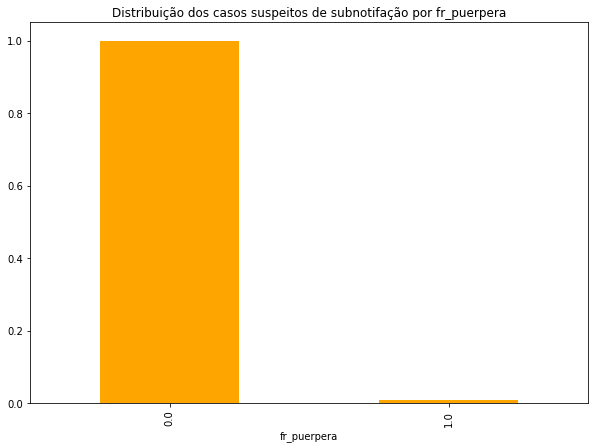

In [58]:
compare_categorical_variables('fr_puerpera')

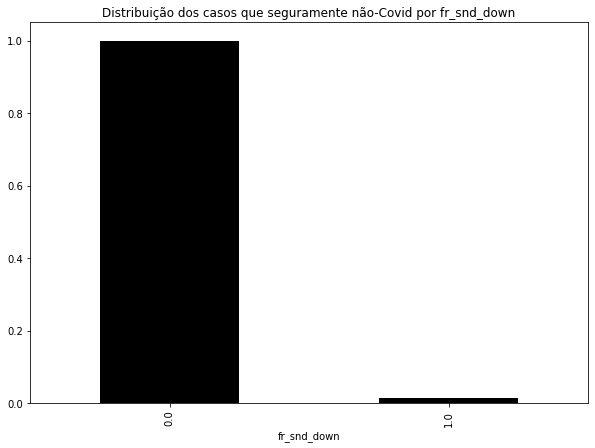

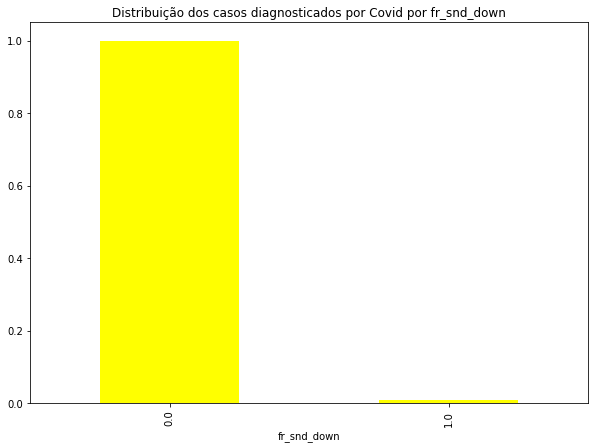

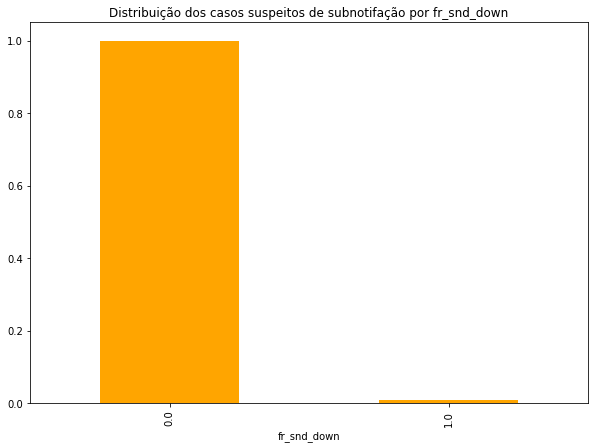

In [61]:
compare_categorical_variables('fr_snd_down')

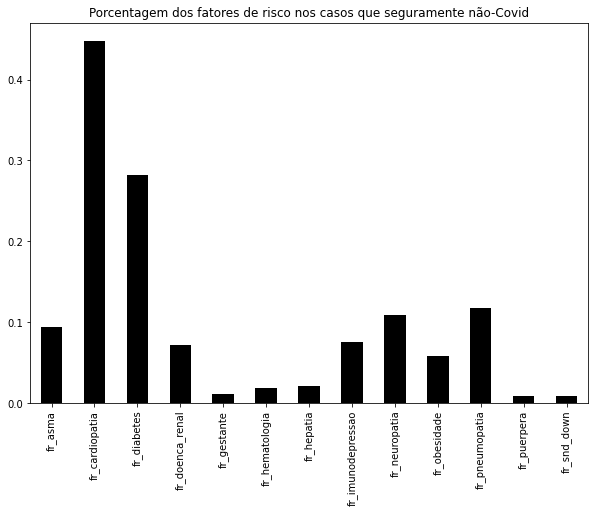

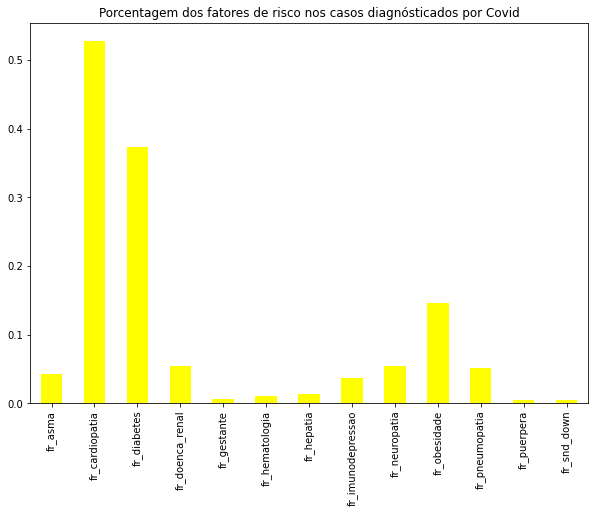

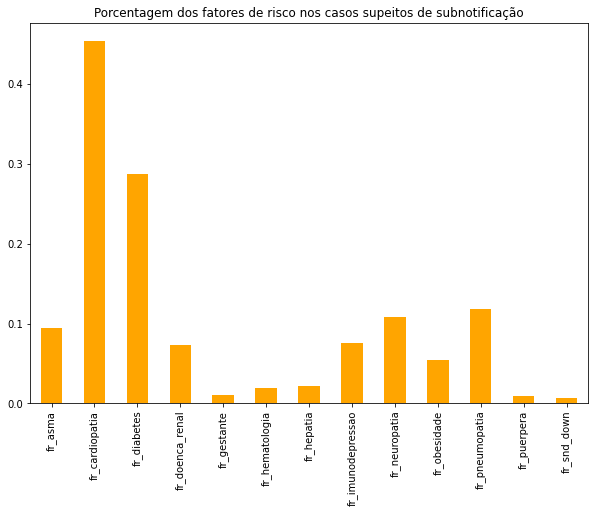

In [25]:
RISK_FACTORS = [column for column in unknow_cases.columns.to_list() if ('fr_' in column)]

plt.title('Porcentagem dos fatores de risco nos casos que seguramente não-Covid')
non_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().plot(kind='bar', color='black')
plt.show()

plt.title('Porcentagem dos fatores de risco nos casos diagnósticados por Covid')
true_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().plot(kind='bar', color='yellow')
plt.show()

plt.title('Porcentagem dos fatores de risco nos casos supeitos de subnotificação')
unknow_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().plot(kind='bar', color='orange')
plt.show()